In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from Proteus.proteus.matrix import tseries as ts
from Proteus.proteus.predic import prediction
from Proteus.proteus.predic import predlib
from Proteus.proteus.predic import betacluster as bc
from Proteus.proteus.visu import matrix as visu
from Proteus.proteus.predic import fselection as fselect
import pandas as pd
import scipy.io
from os import listdir
import cPickle as pickle
from sklearn import cross_validation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.utils import shuffle

from sklearn import preprocessing
from sklearn.cross_validation import StratifiedKFold

from sklearn.metrics import roc_curve, auc
from scipy import interp

//anaconda/lib/python2.7/site-packages/numpy/lib/utils.py:95: DeprecationWarning: `scipy.weave` is deprecated, use `weave` instead!
  warnings.warn(depdoc, DeprecationWarning)


In [2]:
# load the model
demograph = pd.read_csv('/Users/christian/git/predicad/cobre/cobre_model_group.csv', index_col=0)
demograph = demograph.sort()

root_path = '/Users/christian/cobre/voxel_ts/'
list_files = listdir(root_path)

#data = scipy.io.loadmat('/Users/christian/cobre/cobre_vols_all.mat')
conn = pd.read_pickle('/Users/christian/cobre/cobre_connectivity_all.pkl')


In [7]:


def plot_roc(mean_tpr, mean_fpr):    
    
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC)')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.legend(loc="lower right")
    plt.show()

# Regression of the confounding vars

In [54]:
data_all = conn[2].loc[demograph.index.values].values
y = demograph['sz'].values

data_all = ts.normalize_data(data_all)
data_all = preprocessing.scale(data_all)
        
# test it
crm = prediction.ConfoundsRm(demograph[['age','sex','FD']].values,data_all)
print crm.transform(demograph[['age','sex','FD']].values[1:10,:],data_all[1:10,:]).shape


(9, 190)


iRelief ...
[1460 1225 1606 ..., 1677  728 1690]
Running grid search ...


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
    ...........................................................................
/Users/christian/git/predicad/scripts_python/<string> in <module>()
----> 1 
      2 
      3 
      4 
      5 
      6 
      7 
      8 
      9 
     10 

...........................................................................
//anaconda/lib/python2.7/site-packages/IPython/kernel/zmq/kernelapp.py in main()
    464 
    465 def main():
    466     """Run an IPKernel as an application"""
    467     app = IPKernelApp.instance()
    468     app.initialize()
--> 469     app.start()
        app.start = <bound method IPKernelApp.start of <IPython.kernel.zmq.kernelapp.IPKernelApp object>>
    470 
    471 
    472 if __name__ == '__main__':
    473     main()

...........................................................................
//anaconda/lib/python2.7/site-packages/IPython/kernel/zmq/kernelapp.py in start(self=<IPython.kernel.zmq.kernelapp.IPKernelApp object>)
    454     def start(self):
    455         if self.poller is not None:
    456             self.poller.start()
    457         self.kernel.start()
    458         try:
--> 459             ioloop.IOLoop.instance().start()
    460         except KeyboardInterrupt:
    461             pass
    462 
    463 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
//anaconda/lib/python2.7/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    146             PollIOLoop.configure(ZMQIOLoop)
    147         return PollIOLoop.instance()
    148     
    149     def start(self):
    150         try:
--> 151             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    152         except ZMQError as e:
    153             if e.errno == ETERM:
    154                 # quietly return on ETERM
    155                 pass

...........................................................................
//anaconda/lib/python2.7/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    832                 self._events.update(event_pairs)
    833                 while self._events:
    834                     fd, events = self._events.popitem()
    835                     try:
    836                         fd_obj, handler_func = self._handlers[fd]
--> 837                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    838                     except (OSError, IOError) as e:
    839                         if errno_from_exception(e) == errno.EPIPE:
    840                             # Happens when the client closes the connection
    841                             pass

...........................................................................
//anaconda/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
//anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    428             # dispatch events:
    429             if events & IOLoop.ERROR:
    430                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    431                 return
    432             if events & IOLoop.READ:
--> 433                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    434                 if not self.socket:
    435                     return
    436             if events & IOLoop.WRITE:
    437                 self._handle_send()

...........................................................................
//anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    460                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    461         else:
    462             if self._recv_callback:
    463                 callback = self._recv_callback
    464                 # self._recv_callback = None
--> 465                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>]
    466                 
    467         # self.update_state()
    468         
    469 

...........................................................................
//anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>],), **kwargs={})
    402         close our socket."""
    403         try:
    404             # Use a NullContext to ensure that all StackContexts are run
    405             # inside our blanket exception handler rather than outside.
    406             with stack_context.NullContext():
--> 407                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>],)
        kwargs = {}
    408         except:
    409             gen_log.error("Uncaught exception, closing connection.",
    410                           exc_info=True)
    411             # Close the socket on an uncaught exception from a user callback

...........................................................................
//anaconda/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
//anaconda/lib/python2.7/site-packages/IPython/kernel/zmq/ipkernel.py in dispatcher(msg=[<zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>])
    276         if self.control_stream:
    277             self.control_stream.on_recv(self.dispatch_control, copy=False)
    278 
    279         def make_dispatcher(stream):
    280             def dispatcher(msg):
--> 281                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>, <zmq.backend.cython.message.Frame object>]
    282             return dispatcher
    283 
    284         for s in self.shell_streams:
    285             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
//anaconda/lib/python2.7/site-packages/IPython/kernel/zmq/ipkernel.py in dispatch_shell(self=<IPython.kernel.zmq.ipkernel.Kernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'from sklearn.naive_bayes import GaussianNB\nfr...], y, (0., 1.01), cv=cv, n_jobs=4)\n\nplt.show()', u'silent': False, u'store_history': True, u'user_expressions': {}, u'user_variables': []}, 'header': {u'msg_id': u'14BCBAAA300B4A2681B6F031583D4B5C', u'msg_type': u'execute_request', u'session': u'A51ADCA8AF1C46EE8F44A79ED1717D36', u'username': u'username'}, 'metadata': {}, 'msg_id': u'14BCBAAA300B4A2681B6F031583D4B5C', 'msg_type': u'execute_request', 'parent_header': {}})
    240             self.log.error("UNKNOWN MESSAGE TYPE: %r", msg_type)
    241         else:
    242             # ensure default_int_handler during handler call
    243             sig = signal(SIGINT, default_int_handler)
    244             try:
--> 245                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <IPython.kernel.zmq.ipkernel.Kernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['A51ADCA8AF1C46EE8F44A79ED1717D36']
        msg = {'buffers': [], 'content': {u'allow_stdin': True, u'code': u'from sklearn.naive_bayes import GaussianNB\nfr...], y, (0., 1.01), cv=cv, n_jobs=4)\n\nplt.show()', u'silent': False, u'store_history': True, u'user_expressions': {}, u'user_variables': []}, 'header': {u'msg_id': u'14BCBAAA300B4A2681B6F031583D4B5C', u'msg_type': u'execute_request', u'session': u'A51ADCA8AF1C46EE8F44A79ED1717D36', u'username': u'username'}, 'metadata': {}, 'msg_id': u'14BCBAAA300B4A2681B6F031583D4B5C', 'msg_type': u'execute_request', 'parent_header': {}}
    246             except Exception:
    247                 self.log.error("Exception in message handler:", exc_info=True)
    248             finally:
    249                 signal(SIGINT, sig)

...........................................................................
//anaconda/lib/python2.7/site-packages/IPython/kernel/zmq/ipkernel.py in execute_request(self=<IPython.kernel.zmq.ipkernel.Kernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['A51ADCA8AF1C46EE8F44A79ED1717D36'], parent={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'from sklearn.naive_bayes import GaussianNB\nfr...], y, (0., 1.01), cv=cv, n_jobs=4)\n\nplt.show()', u'silent': False, u'store_history': True, u'user_expressions': {}, u'user_variables': []}, 'header': {u'msg_id': u'14BCBAAA300B4A2681B6F031583D4B5C', u'msg_type': u'execute_request', u'session': u'A51ADCA8AF1C46EE8F44A79ED1717D36', u'username': u'username'}, 'metadata': {}, 'msg_id': u'14BCBAAA300B4A2681B6F031583D4B5C', 'msg_type': u'execute_request', 'parent_header': {}})
    384 
    385         reply_content = {}
    386         # FIXME: the shell calls the exception handler itself.
    387         shell._reply_content = None
    388         try:
--> 389             shell.run_cell(code, store_history=store_history, silent=silent)
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <I....kernel.zmq.zmqshell.ZMQInteractiveShell object>>
        code = u'from sklearn.naive_bayes import GaussianNB\nfr...], y, (0., 1.01), cv=cv, n_jobs=4)\n\nplt.show()'
        store_history = True
        silent = False
    390         except:
    391             status = u'error'
    392             # FIXME: this code right now isn't being used yet by default,
    393             # because the run_cell() call above directly fires off exception

...........................................................................
//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_cell(self=<IPython.kernel.zmq.zmqshell.ZMQInteractiveShell object>, raw_cell=u'from sklearn.naive_bayes import GaussianNB\nfr...], y, (0., 1.01), cv=cv, n_jobs=4)\n\nplt.show()', store_history=True, silent=False, shell_futures=True)
   2736                 code_ast = self.transform_ast(code_ast)
   2737 
   2738                 # Execute the user code
   2739                 interactivity = "none" if silent else self.ast_node_interactivity
   2740                 self.run_ast_nodes(code_ast.body, cell_name,
-> 2741                                    interactivity=interactivity, compiler=compiler)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2742                 
   2743                 self.events.trigger('post_execute')
   2744                 if not silent:
   2745                     self.events.trigger('post_run_cell')

...........................................................................
//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<IPython.kernel.zmq.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.FunctionDef object>, <_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>], cell_name='<ipython-input-177-d8b3e7274ecd>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler instance>)
   2822 
   2823         try:
   2824             for i, node in enumerate(to_run_exec):
   2825                 mod = ast.Module([node])
   2826                 code = compiler(mod, cell_name, "exec")
-> 2827                 if self.run_code(code):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <I....kernel.zmq.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x14b6db830, file "<ipython-input-177-d8b3e7274ecd>", line 81>
   2828                     return True
   2829 
   2830             for i, node in enumerate(to_run_interactive):
   2831                 mod = ast.Interactive([node])

...........................................................................
//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_code(self=<IPython.kernel.zmq.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x14b6db830, file "<ipython-input-177-d8b3e7274ecd>", line 81>)
   2878         outflag = 1  # happens in more places, so it's easier as default
   2879         try:
   2880             try:
   2881                 self.hooks.pre_run_code_hook()
   2882                 #rprint('Running code', repr(code_obj)) # dbg
-> 2883                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x14b6db830, file "<ipython-input-177-d8b3e7274ecd>", line 81>
        self.user_global_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'BaggingClassifier': <class 'sklearn.ensemble.bagging.BaggingClassifier'>, 'FastICA': <class 'sklearn.decomposition.fastica_.FastICA'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'In': ['', u"get_ipython().magic(u'matplotlib inline')\nimp...nfrom sklearn.ensemble import AdaBoostClassifier", u"# load the model\ndemograph = pd.read_csv('/Us...ristian/cobre/cobre_connectivity_all.pkl','rb'))", u"from sklearn.cross_validation import Stratifie...= demograph['sz'].values\n\n\n\nx.shape, y.shape", u"reload(prediction)\nreload(predlib)\nfrom skle...re\n    \nprint 'Total score: ', total_score/10.", u"reload(prediction)\nreload(predlib)\nfrom skle...re\n    \nprint 'Total score: ', total_score/10.", u'w', u'f_selected', u"reload(prediction)\nreload(predlib)\nfrom skle...re\n    \nprint 'Total score: ', total_score/10.", u"reload(prediction)\nreload(predlib)\nreload(fs...re\n    \nprint 'Total score: ', total_score/10.", u"reload(prediction)\nreload(predlib)\nreload(fs...re\n    \nprint 'Total score: ', total_score/10.", u"reload(prediction)\nreload(predlib)\nreload(fs...re\n    \nprint 'Total score: ', total_score/10.", u"reload(prediction)\nreload(predlib)\nreload(fs...re\n    \nprint 'Total score: ', total_score/10.", u"reload(prediction)\nreload(predlib)\nreload(fs...re\n    \nprint 'Total score: ', total_score/10.", u"reload(prediction)\nreload(predlib)\nreload(fs...re\n    \nprint 'Total score: ', total_score/10.", u"reload(prediction)\nreload(predlib)\nreload(fs...re\n    \nprint 'Total score: ', total_score/10.", u"reload(prediction)\nreload(predlib)\nreload(fs...re\n    \nprint 'Total score: ', total_score/10.", u"reload(prediction)\nreload(predlib)\nreload(fs...re\n    \nprint 'Total score: ', total_score/10.", u"reload(prediction)\nreload(predlib)\nreload(fs...re\n    \nprint 'Total score: ', total_score/10.", u"reload(prediction)\nreload(predlib)\nreload(fs...re\n    \nprint 'Total score: ', total_score/10.", ...], 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'Out': {3: ((146, 2016), (146,)), 6: array([[ 0.        ,  0.01210144,  0.00150122, ....  0.03345234,
         0.        ,  0.01888745]]), 7: array([1340, 1253, 1504, 2011, 1802, 1419,  576,...  421, 1054,  610,  681,  728, 1677, 1260,  612]), 23: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1]), 32: array([1237,  322,  189,  167, 1795,  193, 1252,... 1272, 1681, 1687, 2011,  511, 1677, 1949, 1690]), 36: array([ 898,  974, 1232,  705, 1172,  727,  657,...  916, 1252, 1082,  622, 1885,  612,  924,  139]), 38: array([ 898,  974, 1232,  705, 1172,  727,  657,...  916, 1252, 1082,  622, 1885,  612,  924,  139]), 43: array([1791,  412, 2014, 1967,  420,  262,  208,...  619,  850,  816,  728,  421, 1260,  645, 1295]), 44: array([ 0.6978267 , -0.37630142,  0.03249219,  0...1, -0.35197171, -0.79839704,
       -0.32604508]), 45: array([ 0.61923803,  0.7786503 ,  0.75117923,  0...5,  0.93274814,  1.29830444,
        0.92231184]), ...}, 'PCA': <class 'sklearn.decomposition.pca.PCA'>, 'SVC': <class 'sklearn.svm.classes.SVC'>, 'S_': array([[ 0.00939751, -0.34390259,  0.24462891, -...  0.18344116,  0.19754028,
        -0.18969727]]), ...}
        self.user_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'BaggingClassifier': <class 'sklearn.ensemble.bagging.BaggingClassifier'>, 'FastICA': <class 'sklearn.decomposition.fastica_.FastICA'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'In': ['', u"get_ipython().magic(u'matplotlib inline')\nimp...nfrom sklearn.ensemble import AdaBoostClassifier", u"# load the model\ndemograph = pd.read_csv('/Us...ristian/cobre/cobre_connectivity_all.pkl','rb'))", u"from sklearn.cross_validation import Stratifie...= demograph['sz'].values\n\n\n\nx.shape, y.shape", u"reload(prediction)\nreload(predlib)\nfrom skle...re\n    \nprint 'Total score: ', total_score/10.", u"reload(prediction)\nreload(predlib)\nfrom skle...re\n    \nprint 'Total score: ', total_score/10.", u'w', u'f_selected', u"reload(prediction)\nreload(predlib)\nfrom skle...re\n    \nprint 'Total score: ', total_score/10.", u"reload(prediction)\nreload(predlib)\nreload(fs...re\n    \nprint 'Total score: ', total_score/10.", u"reload(prediction)\nreload(predlib)\nreload(fs...re\n    \nprint 'Total score: ', total_score/10.", u"reload(prediction)\nreload(predlib)\nreload(fs...re\n    \nprint 'Total score: ', total_score/10.", u"reload(prediction)\nreload(predlib)\nreload(fs...re\n    \nprint 'Total score: ', total_score/10.", u"reload(prediction)\nreload(predlib)\nreload(fs...re\n    \nprint 'Total score: ', total_score/10.", u"reload(prediction)\nreload(predlib)\nreload(fs...re\n    \nprint 'Total score: ', total_score/10.", u"reload(prediction)\nreload(predlib)\nreload(fs...re\n    \nprint 'Total score: ', total_score/10.", u"reload(prediction)\nreload(predlib)\nreload(fs...re\n    \nprint 'Total score: ', total_score/10.", u"reload(prediction)\nreload(predlib)\nreload(fs...re\n    \nprint 'Total score: ', total_score/10.", u"reload(prediction)\nreload(predlib)\nreload(fs...re\n    \nprint 'Total score: ', total_score/10.", u"reload(prediction)\nreload(predlib)\nreload(fs...re\n    \nprint 'Total score: ', total_score/10.", ...], 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'Out': {3: ((146, 2016), (146,)), 6: array([[ 0.        ,  0.01210144,  0.00150122, ....  0.03345234,
         0.        ,  0.01888745]]), 7: array([1340, 1253, 1504, 2011, 1802, 1419,  576,...  421, 1054,  610,  681,  728, 1677, 1260,  612]), 23: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1]), 32: array([1237,  322,  189,  167, 1795,  193, 1252,... 1272, 1681, 1687, 2011,  511, 1677, 1949, 1690]), 36: array([ 898,  974, 1232,  705, 1172,  727,  657,...  916, 1252, 1082,  622, 1885,  612,  924,  139]), 38: array([ 898,  974, 1232,  705, 1172,  727,  657,...  916, 1252, 1082,  622, 1885,  612,  924,  139]), 43: array([1791,  412, 2014, 1967,  420,  262,  208,...  619,  850,  816,  728,  421, 1260,  645, 1295]), 44: array([ 0.6978267 , -0.37630142,  0.03249219,  0...1, -0.35197171, -0.79839704,
       -0.32604508]), 45: array([ 0.61923803,  0.7786503 ,  0.75117923,  0...5,  0.93274814,  1.29830444,
        0.92231184]), ...}, 'PCA': <class 'sklearn.decomposition.pca.PCA'>, 'SVC': <class 'sklearn.svm.classes.SVC'>, 'S_': array([[ 0.00939751, -0.34390259,  0.24462891, -...  0.18344116,  0.19754028,
        -0.18969727]]), ...}
   2884             finally:
   2885                 # Reset our crash handler in place
   2886                 sys.excepthook = old_excepthook
   2887         except SystemExit:

...........................................................................
/Users/christian/git/predicad/scripts_python/<ipython-input-177-d8b3e7274ecd> in <module>()
     76 candidat_f = fselect.nBest(w,108)
     77 cls2 = prediction.get_opt_model(scaler.transform(data_all[train,:])[:,candidat_f],y[train])
     78 
     79 title="margin maximization SVM"
     80 estimator = SVC(gamma=0.001)
---> 81 plot_learning_curve(cls2, title, scaler.transform(data_all)[:,candidat_f], y, (0., 1.01), cv=cv, n_jobs=4)
     82 
     83 plt.show()
     84 
     85 

...........................................................................
/Users/christian/git/predicad/scripts_python/<ipython-input-177-d8b3e7274ecd> in plot_learning_curve(estimator=SVC(C=10.0, cache_size=200, class_weight='auto',...e=None, shrinking=True, tol=0.001, verbose=False), title='margin maximization SVM', X=array([[ 0.70466908,  1.61864307,  0.41112229, ....  0.95558305,
        -0.75691501,  0.8277123 ]]), y=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1]), ylim=(0.0, 1.01), cv=sklearn.cross_validation.StratifiedKFold(labels=...1], n_folds=10, shuffle=False, random_state=None), n_jobs=4, train_sizes=array([ 0.1  ,  0.325,  0.55 ,  0.775,  1.   ]))
     40     if ylim is not None:
     41         plt.ylim(*ylim)
     42     plt.xlabel("Training examples")
     43     plt.ylabel("Score")
     44     train_sizes, train_scores, test_scores = learning_curve(
---> 45         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
     46     train_scores_mean = np.mean(train_scores, axis=1)
     47     train_scores_std = np.std(train_scores, axis=1)
     48     test_scores_mean = np.mean(test_scores, axis=1)
     49     test_scores_std = np.std(test_scores, axis=1)

...........................................................................
//anaconda/lib/python2.7/site-packages/sklearn/learning_curve.py in learning_curve(estimator=SVC(C=10.0, cache_size=200, class_weight='auto',...e=None, shrinking=True, tol=0.001, verbose=False), X=array([[ 0.70466908,  1.61864307,  0.41112229, ....  0.95558305,
        -0.75691501,  0.8277123 ]]), y=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1]), train_sizes=array([ 0.1  ,  0.325,  0.55 ,  0.775,  1.   ]), cv=[(array([  8,   9,  10,  11,  12,  13,  14,  15,  ...36, 137, 138, 139, 140, 141, 142, 143, 144, 145]), array([ 0,  1,  2,  3,  4,  5,  6,  7, 74, 75, 76, 77, 78, 79, 80, 81])), (array([  0,   1,   2,   3,   4,   5,   6,   7,  ...36, 137, 138, 139, 140, 141, 142, 143, 144, 145]), array([ 8,  9, 10, 11, 12, 13, 14, 15, 82, 83, 84, 85, 86, 87, 88, 89])), (array([  0,   1,   2,   3,   4,   5,   6,   7,  ...36, 137, 138, 139, 140, 141, 142, 143, 144, 145]), array([16, 17, 18, 19, 20, 21, 22, 23, 90, 91, 92, 93, 94, 95, 96])), (array([  0,   1,   2,   3,   4,   5,   6,   7,  ...36, 137, 138, 139, 140, 141, 142, 143, 144, 145]), array([ 24,  25,  26,  27,  28,  29,  30,  31,  97,  98,  99, 100, 101,
       102, 103])), (array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 138, 139, 140, 141, 142, 143,
       144, 145]), array([ 32,  33,  34,  35,  36,  37,  38, 104, 105, 106, 107, 108, 109, 110])), (array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 138, 139, 140, 141, 142, 143,
       144, 145]), array([ 39,  40,  41,  42,  43,  44,  45, 111, 112, 113, 114, 115, 116, 117])), (array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 138, 139, 140, 141, 142, 143,
       144, 145]), array([ 46,  47,  48,  49,  50,  51,  52, 118, 119, 120, 121, 122, 123, 124])), (array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 138, 139, 140, 141, 142, 143,
       144, 145]), array([ 53,  54,  55,  56,  57,  58,  59, 125, 126, 127, 128, 129, 130, 131])), (array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 131, 139, 140, 141, 142, 143,
       144, 145]), array([ 60,  61,  62,  63,  64,  65,  66, 132, 133, 134, 135, 136, 137, 138])), (array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 131, 132, 133, 134, 135, 136,
       137, 138]), array([ 67,  68,  69,  70,  71,  72,  73, 139, 140, 141, 142, 143, 144, 145]))], scoring=None, exploit_incremental_learning=False, n_jobs=4, pre_dispatch='all', verbose=0)
    131             scorer, verbose) for train, test in cv)
    132     else:
    133         out = parallel(delayed(_fit_and_score)(
    134             clone(estimator), X, y, scorer, train[:n_train_samples], test,
    135             verbose, parameters=None, fit_params=None, return_train_score=True)
--> 136             for train, test in cv for n_train_samples in train_sizes_abs)
        cv = [(array([  8,   9,  10,  11,  12,  13,  14,  15,  ...36, 137, 138, 139, 140, 141, 142, 143, 144, 145]), array([ 0,  1,  2,  3,  4,  5,  6,  7, 74, 75, 76, 77, 78, 79, 80, 81])), (array([  0,   1,   2,   3,   4,   5,   6,   7,  ...36, 137, 138, 139, 140, 141, 142, 143, 144, 145]), array([ 8,  9, 10, 11, 12, 13, 14, 15, 82, 83, 84, 85, 86, 87, 88, 89])), (array([  0,   1,   2,   3,   4,   5,   6,   7,  ...36, 137, 138, 139, 140, 141, 142, 143, 144, 145]), array([16, 17, 18, 19, 20, 21, 22, 23, 90, 91, 92, 93, 94, 95, 96])), (array([  0,   1,   2,   3,   4,   5,   6,   7,  ...36, 137, 138, 139, 140, 141, 142, 143, 144, 145]), array([ 24,  25,  26,  27,  28,  29,  30,  31,  97,  98,  99, 100, 101,
       102, 103])), (array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 138, 139, 140, 141, 142, 143,
       144, 145]), array([ 32,  33,  34,  35,  36,  37,  38, 104, 105, 106, 107, 108, 109, 110])), (array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 138, 139, 140, 141, 142, 143,
       144, 145]), array([ 39,  40,  41,  42,  43,  44,  45, 111, 112, 113, 114, 115, 116, 117])), (array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 138, 139, 140, 141, 142, 143,
       144, 145]), array([ 46,  47,  48,  49,  50,  51,  52, 118, 119, 120, 121, 122, 123, 124])), (array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 138, 139, 140, 141, 142, 143,
       144, 145]), array([ 53,  54,  55,  56,  57,  58,  59, 125, 126, 127, 128, 129, 130, 131])), (array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 131, 139, 140, 141, 142, 143,
       144, 145]), array([ 60,  61,  62,  63,  64,  65,  66, 132, 133, 134, 135, 136, 137, 138])), (array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 131, 132, 133, 134, 135, 136,
       137, 138]), array([ 67,  68,  69,  70,  71,  72,  73, 139, 140, 141, 142, 143, 144, 145]))]
    137         out = np.array(out)[:, :2]
    138         n_cv_folds = out.shape[0] // n_unique_ticks
    139         out = out.reshape(n_cv_folds, n_unique_ticks, 2)
    140 

...........................................................................
//anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=4), iterable=<generator object <genexpr>>)
    655             if pre_dispatch == "all" or n_jobs == 1:
    656                 # The iterable was consumed all at once by the above for loop.
    657                 # No need to wait for async callbacks to trigger to
    658                 # consumption.
    659                 self._iterating = False
--> 660             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=4)>
    661             # Make sure that we get a last message telling us we are done
    662             elapsed_time = time.time() - self._start_time
    663             self._print('Done %3i out of %3i | elapsed: %s finished',
    664                         (len(self._output),

    ---------------------------------------------------------------------------
    Sub-process traceback:
    ---------------------------------------------------------------------------
    ValueError                                         Sat Apr  4 23:04:03 2015
PID: 13795                              Python 2.7.9: //anaconda/bin/python
...........................................................................
//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.pyc in _fit_and_score(estimator=SVC(C=10.0, cache_size=200, class_weight='auto',...e=None, shrinking=True, tol=0.001, verbose=False), X=array([[ 0.70466908,  1.61864307,  0.41112229, ....  0.95558305,
        -0.75691501,  0.8277123 ]]), y=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1]), scorer=<function _passthrough_scorer>, train=array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), test=array([ 0,  1,  2,  3,  4,  5,  6,  7, 74, 75, 76, 77, 78, 79, 80, 81]), verbose=0, parameters=None, fit_params={}, return_train_score=True, return_parameters=False)
   1234     X_train, y_train = _safe_split(estimator, X, y, train)
   1235     X_test, y_test = _safe_split(estimator, X, y, test, train)
   1236     if y_train is None:
   1237         estimator.fit(X_train, **fit_params)
   1238     else:
-> 1239         estimator.fit(X_train, y_train, **fit_params)
   1240     test_score = _score(estimator, X_test, y_test, scorer)
   1241     if return_train_score:
   1242         train_score = _score(estimator, X_train, y_train, scorer)
   1243 

...........................................................................
//anaconda/lib/python2.7/site-packages/sklearn/svm/base.pyc in fit(self=SVC(C=10.0, cache_size=200, class_weight='auto',...e=None, shrinking=True, tol=0.001, verbose=False), X=array([[ 0.02708287, -0.58059954,  0.28788282, .... -0.90998207,
        -0.90019126,  0.38975233]]), y=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), sample_weight=None)
    133         if sparse and self.kernel == "precomputed":
    134             raise TypeError("Sparse precomputed kernels are not supported.")
    135         self._sparse = sparse and not callable(self.kernel)
    136 
    137         X = atleast2d_or_csr(X, dtype=np.float64, order='C')
--> 138         y = self._validate_targets(y)
    139 
    140         sample_weight = np.asarray([]
    141                                    if sample_weight is None
    142                                    else sample_weight, dtype=np.float64)

...........................................................................
//anaconda/lib/python2.7/site-packages/sklearn/svm/base.pyc in _validate_targets(self=SVC(C=10.0, cache_size=200, class_weight='auto',...e=None, shrinking=True, tol=0.001, verbose=False), y=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
    442         cls, y = np.unique(y_, return_inverse=True)
    443         self.class_weight_ = compute_class_weight(self.class_weight, cls, y_)
    444         if len(cls) < 2:
    445             raise ValueError(
    446                 "The number of classes has to be greater than one; got %d"
--> 447                 % len(cls))
    448 
    449         self.classes_ = cls
    450 
    451         return np.asarray(y, dtype=np.float64, order='C')

ValueError: The number of classes has to be greater than one; got 1
___________________________________________________________________________

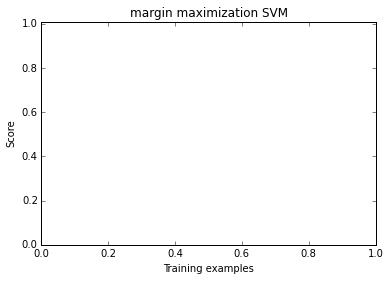

In [177]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.learning_curve import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt




data_all = conn[4].loc[demograph.index.values].values
data_all = ts.normalize_data(data_all)
#data_all = preprocessing.scale(data_all)
scaler = preprocessing.StandardScaler().fit(data_all)
    
# Feature selection
w = fselect.irelief_cross(scaler.transform(data_all[train,:]),y[train],10,False)
candidat_f = fselect.nBest(w,108)
cls2 = prediction.get_opt_model(scaler.transform(data_all[train,:])[:,candidat_f],y[train])

title="margin maximization SVM"
estimator = SVC(gamma=0.001)
plot_learning_curve(cls2, title, scaler.transform(data_all)[:,candidat_f], y, (0., 1.01), cv=cv, n_jobs=4)

plt.show()

In [3]:


reload(predlib)
reload(fselect)
reload(prediction)

# selecte a network scale and extract the features
x = conn[4].loc[demograph.index.values].values
y = demograph['sz'].values



x.shape, y.shape

((146, 2016), (146,))

In [ ]:
x1 = conn[2].loc[demograph.index.values].values
# remove intra matrix mean and var
x1 = ts.normalize_data(x1)
cls1 = prediction.modelpred(x1,y)

x2 = conn[4].loc[demograph.index.values].values
# remove intra matrix mean and var
x2 = ts.normalize_data(x2)
cls2 = prediction.modelpred(x2,y)

x3 = conn[6].loc[demograph.index.values].values
# remove intra matrix mean and var
x3 = ts.normalize_data(x3)
cls3 = prediction.modelpred(x3,y)

# SVM random feature selection

In [5]:
from sklearn import svm
from sklearn import cross_validation
from random import randint

data_all = conn[4].loc[demograph.index.values].values
y = demograph['sz'].values

data_all, y = shuffle(data_all, y, random_state=0)

data_all = ts.normalize_data(data_all)
#data_all = preprocessing.scale(data_all.T).T
data_all = preprocessing.scale(data_all)
scaler = preprocessing.StandardScaler().fit(data_all)

ntot =1
test_score=[]
train_score=[]
""""
for i in range(0,ntot):
    #clf = AdaBoostClassifier(n_estimators=1000)
    #clf = grid.best_estimator_
    clf = svm.SVC(kernel='rbf', class_weight='auto')
    #clf.score(x_scaled[test,:],y[test])
    cv = StratifiedKFold(y=y, n_folds=10)
    rnd_samp = [randint(0,x.shape[1]-1) for p in range(0,80)]
    scores = cross_validation.cross_val_score(clf, ts.normalize_data(x[:,rnd_samp]), y, cv=cv)
    #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    total_score += scores.mean()
    
total_score /= ntot
print total_score
"""

#cv = cross_validation.LeaveOneOut(data_all.shape[0])
for i in range(0,ntot):
    
    rnd_samp = [randint(0,data_all.shape[1]-1) for p in range(0,108)]
    cv = StratifiedKFold(y=y, n_folds=10)
    for i, (train, test) in enumerate(cv):

        # Feature selection
        w = fselect.irelief_cross(data_all[train,:],y[train],10)
        candidat_f = fselect.nBest(w,108)

        cls2 = prediction.get_opt_model(scaler.transform(data_all[train,:])[:,rnd_samp],y[train])
        cls2.score(scaler.transform(data_all[train,:])[:,rnd_samp],y[train])

        tmp_score = cls2.score(scaler.transform(data_all[train])[:,rnd_samp],y[train])
        train_score.append(tmp_score)
        print 'Train: ', tmp_score
        tmp_score = cls2.score(scaler.transform(data_all[test])[:,rnd_samp],y[test])
        test_score.append(tmp_score)
        print 'Test: ', tmp_score
    
    
print 'Train score: ', np.mean(train_score), np.std(train_score)
print 'Test score: ', np.mean(test_score), np.std(test_score)

iRelief ...
iRelief, sample size:  (116, 2016)
iRelief, sample size:  (116, 2016)
iRelief, sample size:  (116, 2016)
iRelief, sample size:  (116, 2016)
iRelief, sample size:  (117, 2016)
iRelief, sample size:  (117, 2016)
iRelief, sample size:  (118, 2016)
iRelief, sample size:  (118, 2016)
iRelief, sample size:  (118, 2016)
iRelief, sample size:  (118, 2016)
Running grid search ...
Train:  1.0
Test:  0.4375
iRelief ...
iRelief, sample size:  (116, 2016)
iRelief, sample size:  (116, 2016)
iRelief, sample size:  (116, 2016)
iRelief, sample size:  (116, 2016)
iRelief, sample size:  (117, 2016)
iRelief, sample size:  (117, 2016)
iRelief, sample size:  (118, 2016)
iRelief, sample size:  (118, 2016)
iRelief, sample size:  (118, 2016)
iRelief, sample size:  (118, 2016)
Running grid search ...
Train:  0.984615384615
Test:  0.5625
iRelief ...
iRelief, sample size:  (117, 2016)
iRelief, sample size:  (117, 2016)
iRelief, sample size:  (117, 2016)
iRelief, sample size:  (117, 2016)
iRelief, samp

# SVM max margin

In [6]:
reload(prediction)
reload(predlib)
reload(fselect)
reload(ts)
from sklearn import preprocessing


data_all = conn[1].loc[demograph.index.values].values
y = demograph['sz'].values

confounds = preprocessing.scale(demograph[['age','sex','FD']].values)
#confounds = preprocessing.scale(demograph[['sex']].values)

data_all, y = shuffle(data_all, y, random_state=0)

data_all = ts.normalize_data(data_all)
#data_all = preprocessing.scale(data_all.T).T
data_all = preprocessing.scale(data_all)
#data_all = ts.normalize_data(data_all)
#scaler = preprocessing.StandardScaler().fit(data_all)
#data_all = scaler.transform(data_all)
scaler = preprocessing.StandardScaler().fit(data_all)

# Feature selection
#w = fselect.irelief_cross(data_all,y,10)
#candidat_f = fselect.nBest(w,108)

folds = 10.
cv = StratifiedKFold(y=y, n_folds=folds)
#cv = cross_validation.LeaveOneOut(data_all.shape[0])
test_score=[]
train_score=[]
all_w = []
for i, (train, test) in enumerate(cv):
    
    print 'Iteration ', i
    # remove confounds
    crm = prediction.ConfoundsRm(confounds[train,:],data_all[train,:])
    #crm.transform(confounds[test,:],data_all[test,:])
    
    # Feature selection
    w = fselect.irelief_cross(scaler.transform(crm.transform(confounds[train,:],data_all[train,:])),y[train],10,False)
    tmp_train_score = []
    tmp_test_score = []
    for nfeatures in range(10,300,10):
        
        candidat_f = fselect.nBest(w,nfeatures)
        print 'Features size: ', candidat_f.shape
        cls2 = prediction.get_opt_model(scaler.transform(crm.transform(confounds[train,:],data_all[train,:]))[:,candidat_f],y[train])

        tmp_score = cls2.score(scaler.transform(crm.transform(confounds[train,:],data_all[train,:]))[:,candidat_f],y[train])
        tmp_train_score.append(tmp_score)

        print 'Train: ', tmp_score
        tmp_score = cls2.score(scaler.transform(crm.transform(confounds[test,:],data_all[test,:]))[:,candidat_f],y[test])
        tmp_test_score.append(tmp_score)
        print 'Test: ', tmp_score
        
    if i==0:
        train_score = tmp_train_score
        test_score = tmp_test_score
        all_w = w
    else:
        train_score = np.vstack((train_score, tmp_train_score)) 
        test_score = np.vstack((test_score, tmp_test_score)) 
        all_w = np.vstack((all_w,w))
    
    
print 'Train score: ', np.mean(train_score,axis=0), np.std(train_score,axis=0)
print 'Test score: ', np.mean(test_score,axis=0), np.std(test_score,axis=0)



Iteration  0


KeyboardInterrupt: 

In [124]:
print dict(dod=(1,2,3,4),ao=(1,2,4,5))

{'ao': (1, 2, 4, 5), 'dod': (1, 2, 3, 4)}


True

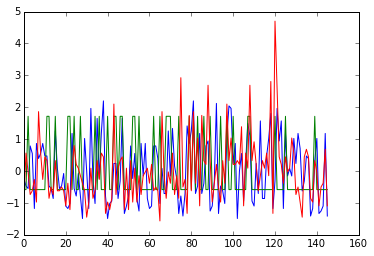

In [80]:
test_score.mean(axis=0)
plt.figure()
plt.plot(confounds)
cv = cross_validation.LeaveOneOut(data_all.shape[0])


## SVM max margin search nBest

In [83]:
reload(prediction)
reload(predlib)
reload(fselect)
reload(ts)
from sklearn import preprocessing


data_all = conn[4].loc[demograph.index.values].values
y = demograph['sz'].values

data_all, y = shuffle(data_all, y, random_state=0)

data_all = ts.normalize_data(data_all)
#data_all = preprocessing.scale(data_all.T).T
data_all = preprocessing.scale(data_all)
#data_all = ts.normalize_data(data_all)
#scaler = preprocessing.StandardScaler().fit(data_all)
#data_all = scaler.transform(data_all)
scaler = preprocessing.StandardScaler().fit(data_all)

# Feature selection
#w = fselect.irelief_cross(data_all,y,10)
#candidat_f = fselect.nBest(w,108)

folds = 10.
cv = StratifiedKFold(y=y, n_folds=folds)
#cv = cross_validation.LeaveOneOut(data_all.shape[0])
test_score=[]
train_score=[]
all_w = []
for i, (train, test) in enumerate(cv):
    
    # Feature selection
    w = fselect.irelief_cross(scaler.transform(data_all[train,:]),y[train],10,False)
    tmp_train_score = []
    tmp_test_score = []
    for nfeatures in range(10,200,10):
        
        candidat_f = fselect.nBest(w,nfeatures)
        print 'Features size: ', candidat_f.shape
        cls2 = prediction.get_opt_model(scaler.transform(data_all[train,:])[:,candidat_f],y[train])

        tmp_score = cls2.score(scaler.transform(data_all[train])[:,candidat_f],y[train])
        tmp_train_score.append(tmp_score)
        print 'Train: ', len(tmp_train_score)
        tmp_score = cls2.score(scaler.transform(data_all[test])[:,candidat_f],y[test])
        tmp_test_score.append(tmp_score)
        print 'Test: ', tmp_score
        
    if i==0:
        train_score = tmp_train_score
        test_score = tmp_test_score
        all_w = w
    else:
        train_score = np.vstack((train_score, tmp_train_score)) 
        test_score = np.vstack((test_score, tmp_test_score)) 
        all_w = np.vstack((all_w,w))
    
    
print 'Train score: ', np.mean(train_score,axis=0), np.std(train_score,axis=0)
print 'Test score: ', np.mean(test_score,axis=0), np.std(test_score,axis=0)



iRelief ...


KeyboardInterrupt: 

### Local selection

In [28]:
reload(prediction)
reload(predlib)
reload(fselect)
reload(ts)
from sklearn import preprocessing


data_all = conn[4].loc[demograph.index.values].values
y = demograph['sz'].values

confounds = preprocessing.scale(demograph[['age','sex','FD']].values)
#confounds = preprocessing.scale(demograph[['sex']].values)

data_all, y = shuffle(data_all, y, random_state=0)

data_all = ts.normalize_data(data_all)
#data_all = preprocessing.scale(data_all.T).T
data_all = preprocessing.scale(data_all)
#data_all = ts.normalize_data(data_all)
#scaler = preprocessing.StandardScaler().fit(data_all)
#data_all = scaler.transform(data_all)
scaler = preprocessing.StandardScaler().fit(data_all)

# Feature selection
#w = fselect.irelief_cross(data_all,y,10)
#candidat_f = fselect.nBest(w,108)

folds = 10.
cv = StratifiedKFold(y=y, n_folds=folds)
#cv = cross_validation.LeaveOneOut(data_all.shape[0])
test_score=[]
train_score=[]
all_w = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
for i, (train, test) in enumerate(cv):
    
    print 'Iteration ', i
    # remove confounds
    crm = prediction.ConfoundsRm(confounds[train,:],data_all[train,:])
    #crm.transform(confounds[test,:],data_all[test,:])
    
    # Feature selection
    x_ = scaler.transform(crm.transform(confounds[train,:],data_all[train,:]))
    w = fselect.irelief_cross(x_,y[train],10,False).mean(axis=0)
    tmp_train_score = []
    tmp_test_score = []
        
    
    #x_ = scaler.transform(crm.transform(confounds[train,:],data_all[train,:]))
    
    cls2,candidat_f,best_i,all_nfeatures,all_scores = prediction.get_opt_model_features_nbest(x_,y[train],w)
    
    print 'Features size: ', candidat_f.shape
    
    x_ = scaler.transform(crm.transform(confounds[train,:],data_all[train,:]))[:,candidat_f]
    tmp_train_score = cls2.score(x_,y[train])

    print 'Train: ', tmp_train_score
    x_ = scaler.transform(crm.transform(confounds[test,:],data_all[test,:]))[:,candidat_f]
    tmp_test_score = cls2.score(x_,y[test])
    probas_ = cls2.predict_proba(x_)
    print 'Test: ', tmp_test_score
    
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
        
    if i==0:
        train_score = tmp_train_score
        test_score = tmp_test_score
        all_w = w
    else:
        train_score = np.vstack((train_score, tmp_train_score)) 
        test_score = np.vstack((test_score, tmp_test_score)) 
        all_w = np.vstack((all_w,w))
    
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
plt.figure()
plot_roc(mean_tpr,mean_fpr)
print 'Train score: ', np.mean(train_score,axis=0), np.std(train_score,axis=0)
print 'Test score: ', np.mean(test_score,axis=0), np.std(test_score,axis=0)



Iteration  0
iRelief ...
Running grid search ...
New best:  0
Running grid search ...
New best:  0.776923076923
Running grid search ...
New best:  0.807692307692
Running grid search ...
Running grid search ...
New best:  0.830769230769
Running grid search ...
New best:  0.838461538462
Running grid search ...
New best:  0.846153846154
Running grid search ...
Running grid search ...
New best:  0.861538461538
Running grid search ...
Running grid search ...
Running grid search ...
New best:  0.869230769231
Running grid search ...
Running grid search ...
Running grid search ...
Features size:  (285,)


ValueError: X.shape[1] = 285 should be equal to 225, the number of features at training time

### Global selection (2 std feature selection)

Iteration  0
iRelief ...
Running grid search ...
Features size:  (95,)
Train:  1.0
Test:  0.375
Iteration  1
iRelief ...
Running grid search ...
Features size:  (89,)
Train:  0.976923076923
Test:  0.625
Iteration  2
iRelief ...
Running grid search ...
Features size:  (105,)
Train:  1.0
Test:  0.666666666667
Iteration  3
iRelief ...
Running grid search ...
Features size:  (91,)
Train:  0.961832061069
Test:  0.733333333333
Iteration  4
iRelief ...
Running grid search ...
Features size:  (108,)
Train:  1.0
Test:  0.5
Iteration  5
iRelief ...
Running grid search ...
Features size:  (95,)
Train:  1.0
Test:  0.714285714286
Iteration  6
iRelief ...
Running grid search ...
Features size:  (97,)
Train:  1.0
Test:  0.714285714286
Iteration  7
iRelief ...
Running grid search ...
Features size:  (113,)
Train:  1.0
Test:  0.928571428571
Iteration  8
iRelief ...
Running grid search ...
Features size:  (92,)
Train:  0.939393939394
Test:  0.642857142857
Iteration  9
iRelief ...
Running grid search ...

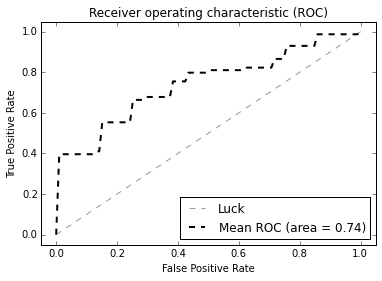

Train score:  [ 0.98251188] [ 0.02327294]
Test score:  [ 0.69] [ 0.17273986]


In [8]:
reload(prediction)
reload(predlib)
reload(fselect)
reload(ts)
from sklearn import preprocessing


data_all = conn[4].loc[demograph.index.values].values
y = demograph['sz'].values

confounds = preprocessing.scale(demograph[['age','sex','FD']].values)
#confounds = preprocessing.scale(demograph[['sex']].values)

data_all, y = shuffle(data_all, y, random_state=0)

data_all = ts.normalize_data(data_all)
#data_all = preprocessing.scale(data_all.T).T
data_all = preprocessing.scale(data_all)
#data_all = ts.normalize_data(data_all)
#scaler = preprocessing.StandardScaler().fit(data_all)
#data_all = scaler.transform(data_all)
scaler = preprocessing.StandardScaler().fit(data_all)

# Feature selection
#w = fselect.irelief_cross(data_all,y,10)
#candidat_f = fselect.nBest(w,108)

folds = 10.
cv = StratifiedKFold(y=y, n_folds=folds)
#cv = cross_validation.LeaveOneOut(data_all.shape[0])
test_score=[]
train_score=[]
all_w = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

for i, (train, test) in enumerate(cv):
    
    print 'Iteration ', i
    # remove confounds
    crm = prediction.ConfoundsRm(confounds[train,:],data_all[train,:])
    #crm.transform(confounds[test,:],data_all[test,:])
    
    # Feature selection
    x_ = scaler.transform(crm.transform(confounds[train,:],data_all[train,:]))
    w = fselect.irelief_cross(x_,y[train],10,False).mean(axis=0)
    candidat_f = fselect.threhold_std(w,2)
    #candidat_f = fselect.nBest(w,best_n)
    tmp_train_score = []
    tmp_test_score = []
        
    
    x_ = scaler.transform(crm.transform(confounds[train,:],data_all[train,:]))[:,candidat_f]
    
    cls2 = prediction.get_opt_model(x_,y[train])
    
    print 'Features size: ', candidat_f.shape
    
    x_ = scaler.transform(crm.transform(confounds[train,:],data_all[train,:]))[:,candidat_f]
    tmp_train_score = cls2.score(x_,y[train])
    print 'Train: ', tmp_train_score
    
    x_ = scaler.transform(crm.transform(confounds[test,:],data_all[test,:]))[:,candidat_f]
    tmp_test_score = cls2.score(x_,y[test])
    probas_ = cls2.predict_proba(x_)
    print 'Test: ', tmp_test_score
    
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
        
    if i==0:
        train_score = tmp_train_score
        test_score = tmp_test_score
        all_w = w
    else:
        train_score = np.vstack((train_score, tmp_train_score)) 
        test_score = np.vstack((test_score, tmp_test_score)) 
        all_w = np.vstack((all_w,w))
    

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0

plt.figure()
plot_roc(mean_tpr, mean_fpr)

print 'Train score: ', np.mean(train_score,axis=0), np.std(train_score,axis=0)
print 'Test score: ', np.mean(test_score,axis=0), np.std(test_score,axis=0)



### Global optimisation std finder

Iteration  0
iRelief ...
(296,)
Running grid search ...
New best:  0.761538461538
(229,)
Running grid search ...
New best:  0.8
(170,)
Running grid search ...
(126,)
Running grid search ...
(95,)
Running grid search ...
(75,)
Running grid search ...
(56,)
Running grid search ...
Features size:  (229,)
Train:  0.938461538462
Test:  0.4375
Iteration  1
iRelief ...
(310,)
Running grid search ...
New best:  0.769230769231
(233,)
Running grid search ...
New best:  0.776923076923
(180,)
Running grid search ...
(148,)
Running grid search ...
(113,)
Running grid search ...
New best:  0.807692307692
(80,)
Running grid search ...
(59,)
Running grid search ...
Features size:  (113,)
Train:  0.9
Test:  0.625
Iteration  2
iRelief ...
(317,)
Running grid search ...
New best:  0.709923664122
(242,)
Running grid search ...
New best:  0.748091603053
(184,)
Running grid search ...
(132,)
Running grid search ...
(98,)
Running grid search ...
(73,)
Running grid search ...
(54,)
Running grid search ...
Fea

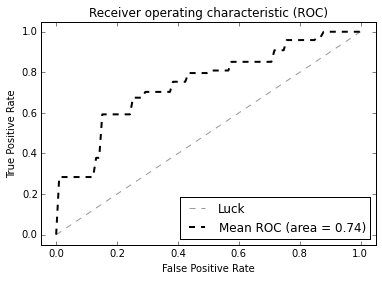

Train score:  [ 0.88444181] [ 0.04515369]
Test score:  [ 0.65339286] [ 0.11699058]


In [11]:
reload(prediction)
reload(predlib)
reload(fselect)
reload(ts)
from sklearn import preprocessing


data_all = conn[4].loc[demograph.index.values].values
y = demograph['sz'].values

confounds = preprocessing.scale(demograph[['age','sex','FD']].values)
#confounds = preprocessing.scale(demograph[['sex']].values)

data_all, y = shuffle(data_all, y, random_state=0)

data_all = ts.normalize_data(data_all)
#data_all = preprocessing.scale(data_all.T).T
data_all = preprocessing.scale(data_all)
#data_all = ts.normalize_data(data_all)
#scaler = preprocessing.StandardScaler().fit(data_all)
#data_all = scaler.transform(data_all)
scaler = preprocessing.StandardScaler().fit(data_all)

# Feature selection
#w = fselect.irelief_cross(data_all,y,10)
#candidat_f = fselect.nBest(w,108)

folds = 10.
cv = StratifiedKFold(y=y, n_folds=folds)
#cv = cross_validation.LeaveOneOut(data_all.shape[0])
test_score=[]
train_score=[]
all_w = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
for i, (train, test) in enumerate(cv):
    
    print 'Iteration ', i
    # remove confounds
    crm = prediction.ConfoundsRm(confounds[train,:],data_all[train,:])
    #crm.transform(confounds[test,:],data_all[test,:])
    
    # Feature selection
    x_ = scaler.transform(crm.transform(confounds[train,:],data_all[train,:]))
    w = fselect.irelief_cross(x_,y[train],10,False).mean(axis=0)
    tmp_train_score = []
    tmp_test_score = []
        
    
    #x_ = scaler.transform(crm.transform(confounds[train,:],data_all[train,:]))
    #get_opt_model_features_std_sv
    cls2,candidat_f,best_n,all_nfeatures,all_scores = prediction.get_opt_model_features_std(x_,y[train],w)
    
    print 'Features size: ', candidat_f.shape
    
    x_ = scaler.transform(crm.transform(confounds[train,:],data_all[train,:]))[:,candidat_f]
    tmp_train_score = cls2.score(x_,y[train])

    print 'Train: ', tmp_train_score
    x_ = scaler.transform(crm.transform(confounds[test,:],data_all[test,:]))[:,candidat_f]
    tmp_test_score = cls2.score(x_,y[test])
    probas_ = cls2.predict_proba(x_)
    print 'Test: ', tmp_test_score
    
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
        
    if i==0:
        train_score = tmp_train_score
        test_score = tmp_test_score
        all_w = w
    else:
        train_score = np.vstack((train_score, tmp_train_score)) 
        test_score = np.vstack((test_score, tmp_test_score)) 
        all_w = np.vstack((all_w,w))
    
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
plt.figure()
plot_roc(mean_tpr,mean_fpr)
print 'Train score: ', np.mean(train_score,axis=0), np.std(train_score,axis=0)
print 'Test score: ', np.mean(test_score,axis=0), np.std(test_score,axis=0)


Iteration  0
iRelief ...
Running grid search ...
New best:  0
Running grid search ...
New best:  0.730769230769
Running grid search ...
Running grid search ...
New best:  0.746153846154
Running grid search ...
New best:  0.769230769231
Running grid search ...
Running grid search ...
Features size:  (373,)
Train:  1.0
Test:  0.4375
Iteration  1
iRelief ...
Running grid search ...
New best:  0
Running grid search ...
New best:  0.730769230769
Running grid search ...
New best:  0.746153846154
Running grid search ...
New best:  0.769230769231
Running grid search ...
Running grid search ...
Running grid search ...
Features size:  (445,)
Train:  1.0
Test:  0.6875
Iteration  2
iRelief ...
Running grid search ...
New best:  0
Running grid search ...
Running grid search ...
Running grid search ...
Running grid search ...
Running grid search ...
New best:  0.671755725191
Running grid search ...
Features size:  (240,)
Train:  1.0
Test:  0.8
Iteration  3
iRelief ...
Running grid search ...
New bes

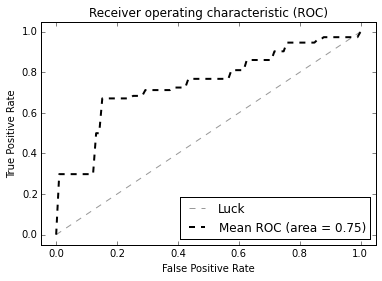

Train score:  [ 0.99924242] [ 0.00227273]
Test score:  [ 0.70107143] [ 0.13111375]


In [5]:
reload(prediction)
reload(predlib)
reload(fselect)
reload(ts)
from sklearn import preprocessing


data_all = conn[5].loc[demograph.index.values].values
y = demograph['sz'].values

confounds = preprocessing.scale(demograph[['age','sex','FD']].values)
#confounds = preprocessing.scale(demograph[['sex']].values)

data_all, y = shuffle(data_all, y, random_state=0)

data_all = ts.normalize_data(data_all)
#data_all = preprocessing.scale(data_all.T).T
data_all = preprocessing.scale(data_all)
#data_all = ts.normalize_data(data_all)
#scaler = preprocessing.StandardScaler().fit(data_all)
#data_all = scaler.transform(data_all)
scaler = preprocessing.StandardScaler().fit(data_all)

# Feature selection
#w = fselect.irelief_cross(data_all,y,10)
#candidat_f = fselect.nBest(w,108)

folds = 10.
cv = StratifiedKFold(y=y, n_folds=folds)
#cv = cross_validation.LeaveOneOut(data_all.shape[0])
test_score=[]
train_score=[]
all_w = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
for i, (train, test) in enumerate(cv):
    
    print 'Iteration ', i
    # remove confounds
    crm = prediction.ConfoundsRm(confounds[train,:],data_all[train,:])
    #crm.transform(confounds[test,:],data_all[test,:])
    
    # Feature selection
    x_ = scaler.transform(crm.transform(confounds[train,:],data_all[train,:]))
    w = fselect.irelief_cross(x_,y[train],10,False).mean(axis=0)
    tmp_train_score = []
    tmp_test_score = []
        
    
    #x_ = scaler.transform(crm.transform(confounds[train,:],data_all[train,:]))
    #get_opt_model_features_std_sv
    cls2,candidat_f,best_n,all_nfeatures,all_scores = prediction.get_opt_model_features_std(x_,y[train],w)
    
    print 'Features size: ', candidat_f.shape
    
    x_ = scaler.transform(crm.transform(confounds[train,:],data_all[train,:]))[:,candidat_f]
    tmp_train_score = cls2.score(x_,y[train])

    print 'Train: ', tmp_train_score
    x_ = scaler.transform(crm.transform(confounds[test,:],data_all[test,:]))[:,candidat_f]
    tmp_test_score = cls2.score(x_,y[test])
    probas_ = cls2.predict_proba(x_)
    print 'Test: ', tmp_test_score
    
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
        
    if i==0:
        train_score = tmp_train_score
        test_score = tmp_test_score
        all_w = w
    else:
        train_score = np.vstack((train_score, tmp_train_score)) 
        test_score = np.vstack((test_score, tmp_test_score)) 
        all_w = np.vstack((all_w,w))
    
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
plt.figure()
plot_roc(mean_tpr,mean_fpr)
print 'Train score: ', np.mean(train_score,axis=0), np.std(train_score,axis=0)
print 'Test score: ', np.mean(test_score,axis=0), np.std(test_score,axis=0)


Iteration  0
iRelief ...
Running grid search ...
New best:  0
Running grid search ...
Running grid search ...
Running grid search ...
Running grid search ...
Running grid search ...
Running grid search ...
Features size:  (2877,)
Train:  1.0
Test:  0.375
Iteration  1
iRelief ...
Running grid search ...
New best:  0
Running grid search ...
Running grid search ...
New best:  0.753846153846
Running grid search ...
Running grid search ...
Running grid search ...
New best:  0.769230769231
Running grid search ...
Features size:  (635,)
Train:  1.0
Test:  0.5
Iteration  2
iRelief ...
Running grid search ...
New best:  0
Running grid search ...
New best:  0.725190839695
Running grid search ...
New best:  0.732824427481
Running grid search ...
Running grid search ...
Running grid search ...
Running grid search ...
Features size:  (1620,)
Train:  1.0
Test:  0.666666666667
Iteration  3
iRelief ...
Running grid search ...
New best:  0
Running grid search ...
Running grid search ...
New best:  0.73

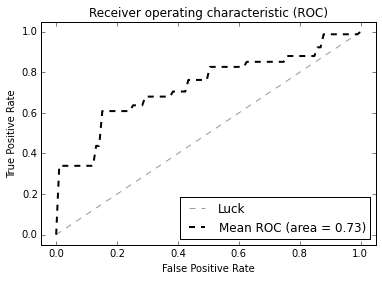

Train score:  [ 1.] [ 0.]
Test score:  [ 0.65511905] [ 0.16240648]


In [7]:
reload(prediction)
reload(predlib)
reload(fselect)
reload(ts)
from sklearn import preprocessing


data_all = conn[6].loc[demograph.index.values].values
y = demograph['sz'].values

confounds = preprocessing.scale(demograph[['age','sex','FD']].values)
#confounds = preprocessing.scale(demograph[['sex']].values)

data_all, y = shuffle(data_all, y, random_state=0)

data_all = ts.normalize_data(data_all)
#data_all = preprocessing.scale(data_all.T).T
data_all = preprocessing.scale(data_all)
#data_all = ts.normalize_data(data_all)
#scaler = preprocessing.StandardScaler().fit(data_all)
#data_all = scaler.transform(data_all)
scaler = preprocessing.StandardScaler().fit(data_all)

# Feature selection
#w = fselect.irelief_cross(data_all,y,10)
#candidat_f = fselect.nBest(w,108)

folds = 10.
cv = StratifiedKFold(y=y, n_folds=folds)
#cv = cross_validation.LeaveOneOut(data_all.shape[0])
test_score=[]
train_score=[]
all_w = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
for i, (train, test) in enumerate(cv):
    
    print 'Iteration ', i
    # remove confounds
    crm = prediction.ConfoundsRm(confounds[train,:],data_all[train,:])
    #crm.transform(confounds[test,:],data_all[test,:])
    
    # Feature selection
    x_ = scaler.transform(crm.transform(confounds[train,:],data_all[train,:]))
    w = fselect.irelief_cross(x_,y[train],10,False).mean(axis=0)
    tmp_train_score = []
    tmp_test_score = []
        
    
    #x_ = scaler.transform(crm.transform(confounds[train,:],data_all[train,:]))
    #get_opt_model_features_std_sv
    cls2,candidat_f,best_n,all_nfeatures,all_scores = prediction.get_opt_model_features_std(x_,y[train],w)
    
    print 'Features size: ', candidat_f.shape
    
    x_ = scaler.transform(crm.transform(confounds[train,:],data_all[train,:]))[:,candidat_f]
    tmp_train_score = cls2.score(x_,y[train])

    print 'Train: ', tmp_train_score
    x_ = scaler.transform(crm.transform(confounds[test,:],data_all[test,:]))[:,candidat_f]
    tmp_test_score = cls2.score(x_,y[test])
    probas_ = cls2.predict_proba(x_)
    print 'Test: ', tmp_test_score
    
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
        
    if i==0:
        train_score = tmp_train_score
        test_score = tmp_test_score
        all_w = w
    else:
        train_score = np.vstack((train_score, tmp_train_score)) 
        test_score = np.vstack((test_score, tmp_test_score)) 
        all_w = np.vstack((all_w,w))
    
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
plt.figure()
plot_roc(mean_tpr,mean_fpr)
print 'Train score: ', np.mean(train_score,axis=0), np.std(train_score,axis=0)
print 'Test score: ', np.mean(test_score,axis=0), np.std(test_score,axis=0)


### Metric with minimise number of support vector

In [31]:
reload(prediction)
reload(predlib)
reload(fselect)
reload(ts)
from sklearn import preprocessing


data_all = conn[4].loc[demograph.index.values].values
y = demograph['sz'].values

confounds = preprocessing.scale(demograph[['age','sex','FD']].values)
#confounds = preprocessing.scale(demograph[['sex']].values)

data_all, y = shuffle(data_all, y, random_state=0)

data_all = ts.normalize_data(data_all)
#data_all = preprocessing.scale(data_all.T).T
data_all = preprocessing.scale(data_all)
#data_all = ts.normalize_data(data_all)
#scaler = preprocessing.StandardScaler().fit(data_all)
#data_all = scaler.transform(data_all)
scaler = preprocessing.StandardScaler().fit(data_all)

# Feature selection
#w = fselect.irelief_cross(data_all,y,10)
#candidat_f = fselect.nBest(w,108)

folds = 10.
cv = StratifiedKFold(y=y, n_folds=folds)
#cv = cross_validation.LeaveOneOut(data_all.shape[0])
test_score=[]
train_score=[]
all_w = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
for i, (train, test) in enumerate(cv):
    
    print 'Iteration ', i
    # remove confounds
    crm = prediction.ConfoundsRm(confounds[train,:],data_all[train,:])
    #crm.transform(confounds[test,:],data_all[test,:])
    
    # Feature selection
    x_ = scaler.transform(crm.transform(confounds[train,:],data_all[train,:]))
    w = fselect.irelief_cross(x_,y[train],10,False).mean(axis=0)
    tmp_train_score = []
    tmp_test_score = []
        
    
    #x_ = scaler.transform(crm.transform(confounds[train,:],data_all[train,:]))
    cls2,candidat_f,best_n,all_nfeatures,all_scores,nsv = prediction.get_opt_model_features_std_sv(x_,y[train],w)
    
    print 'nSV: ', nsv
    print 'Features size: ', candidat_f.shape
    
    x_ = scaler.transform(crm.transform(confounds[train,:],data_all[train,:]))[:,candidat_f]
    tmp_train_score = cls2.score(x_,y[train])

    print 'Train: ', tmp_train_score
    x_ = scaler.transform(crm.transform(confounds[test,:],data_all[test,:]))[:,candidat_f]
    tmp_test_score = cls2.score(x_,y[test])
    probas_ = cls2.predict_proba(x_)
    print 'Test: ', tmp_test_score
    
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
        
    if i==0:
        train_score = tmp_train_score
        test_score = tmp_test_score
        all_w = w
    else:
        train_score = np.vstack((train_score, tmp_train_score)) 
        test_score = np.vstack((test_score, tmp_test_score)) 
        all_w = np.vstack((all_w,w))
    
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
plt.figure()
plot_roc(mean_tpr,mean_fpr)
print 'Train score: ', np.mean(train_score,axis=0), np.std(train_score,axis=0)
print 'Test score: ', np.mean(test_score,axis=0), np.std(test_score,axis=0)


Iteration  0
iRelief ...
Running grid search ...
New best:  0.28
Running grid search ...
Running grid search ...
Running grid search ...
New best:  0.333846153846
Running grid search ...
Running grid search ...
Running grid search ...
nSV:  [32 35]
Features size:  (129,)
Train:  1.0
Test:  0.4375
Iteration  1
iRelief ...
Running grid search ...
New best:  0.230769230769
Running grid search ...
New best:  0.26
Running grid search ...
Running grid search ...
Running grid search ...
New best:  0.327692307692
Running grid search ...
Running grid search ...
nSV:  [31 37]
Features size:  (103,)
Train:  0.984615384615
Test:  0.5
Iteration  2
iRelief ...
Running grid search ...
New best:  0.126717557252
Running grid search ...
New best:  0.16641221374
Running grid search ...
Running grid search ...
New best:  0.172519083969
Running grid search ...
New best:  0.177099236641
Running grid search ...
New best:  0.187786259542
Running grid search ...
New best:  0.221374045802
nSV:  [34 41]
Features

KeyboardInterrupt: 

In [72]:

plt.figure
plt.plot(range(10,500,10),train_score.mean(axis=0))
plt.plot(range(10,500,10),test_score.mean(axis=0))
test_score.mean(axis=0).max()
pd.read_csv('/Users/christian/git/predicad/cobre/COBRE_maxmargin_data.csv',
#train_score.mean(axis=0).shape


AttributeError: 'list' object has no attribute 'mean'

# iRelief AdaBoost SVM

In [176]:
reload(prediction)
reload(predlib)
reload(fselect)
reload(ts)
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing


data_all = conn[4].loc[demograph.index.values].values
data_all = ts.normalize_data(data_all)
#data_all = preprocessing.scale(data_all.T).T
data_all = preprocessing.scale(data_all)
#data_all = ts.normalize_data(data_all)
#scaler = preprocessing.StandardScaler().fit(data_all)
#data_all = scaler.transform(data_all)
scaler = preprocessing.StandardScaler().fit(data_all)

# Feature selection
#w = fselect.irelief_cross(data_all,y,10)
#candidat_f = fselect.nBest(w,108)
n_estimators = 15
learning_rate = 1.

folds = 10.
cv = StratifiedKFold(y=y, n_folds=folds)
#cv = cross_validation.LeaveOneOut(data_all.shape[0])
test_score=[]
train_score=[]
for i, (train, test) in enumerate(cv):
    
    # Feature selection
    w = fselect.irelief_cross(scaler.transform(data_all[train,:]),y[train],10, verbose=False)
    candidat_f = fselect.nBest(w,500)
    
    # Adaboost
    #cls2 = svm.SVC(C=1.0, gamma=.1, cache_size=200, class_weight='auto', kernel='rbf', probability=True)
    cls2 = prediction.get_opt_model(scaler.transform(data_all[train,:])[:,candidat_f],y[train])
    cls2.probability = True
    ada_real = AdaBoostClassifier(base_estimator=cls2,
                                learning_rate=learning_rate,
                                n_estimators=n_estimators,
                                algorithm="SAMME.R")
        
    ada_real.fit(scaler.transform(data_all[train,:])[:,candidat_f],y[train])
    
    # compute the results
    tmp_score = ada_real.score(scaler.transform(data_all[train])[:,candidat_f],y[train])
    train_score.append(tmp_score)
    print 'Train: ', tmp_score
    tmp_score = ada_real.score(scaler.transform(data_all[test])[:,candidat_f],y[test])
    test_score.append(tmp_score)
    print 'Test: ', tmp_score
    
    
print 'Train score: ', np.mean(train_score), np.std(train_score)
print 'Test score: ', np.mean(test_score), np.std(test_score)

iRelief ...


KeyboardInterrupt: 

# Select kBest

In [100]:
reload(prediction)
reload(predlib)
reload(fselect)
reload(ts)
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 
from sklearn import svm

data_all = conn[4].loc[demograph.index.values].values
data_all = ts.normalize_data(data_all)
#data_all = preprocessing.scale(data_all.T).T
data_all = preprocessing.scale(data_all)
scaler = preprocessing.StandardScaler().fit(data_all)
 # Feature selection
kbest_f = SelectKBest(f_classif , k=108).fit(data_all, y)

folds = 10.
cv = StratifiedKFold(y=y, n_folds=folds)
#cv = cross_validation.LeaveOneOut(data_all.shape[0])
test_score=[]
train_score=[]
for i, (train, test) in enumerate(cv):
    #scaler = preprocessing.StandardScaler().fit(data_all[train,:])
    # remove intra matrix mean and var
    cls2 = prediction.get_opt_model(kbest_f.transform(scaler.transform(data_all[train,:])), y[train])
    
    tmp_score = cls2.score(kbest_f.transform(scaler.transform(data_all[train])),y[train])
    train_score.append(tmp_score)
    print 'Train: ', tmp_score
    
    tmp_score = cls2.score(kbest_f.transform(scaler.transform(data_all[test])),y[test])
    test_score.append(tmp_score)
    print 'Test: ', tmp_score
    
    
print 'Train score: ', np.mean(train_score), np.std(train_score)
print 'Test score: ', np.mean(test_score), np.std(test_score)

Running grid search ...
('The best classifier is: ', SVC(C=10.0, cache_size=200, class_weight='auto', coef0=0.0, degree=3,
  gamma=0.0001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False))
Train:  0.738461538462
Test:  0.8125
Running grid search ...
('The best classifier is: ', SVC(C=10.0, cache_size=200, class_weight='auto', coef0=0.0, degree=3,
  gamma=0.0001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False))
Train:  0.753846153846
Test:  0.75
Running grid search ...
('The best classifier is: ', SVC(C=1.0, cache_size=200, class_weight='auto', coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False))
Train:  0.763358778626
Test:  0.666666666667
Running grid search ...
('The best classifier is: ', SVC(C=1.0, cache_size=200, class_weight='auto', coef0=0.0, degree=3,
  gamma=0.001, k

In [80]:
"""
reload(ts)
plt.figure()
data_all = conn[4].loc[demograph.index.values].values
data_all = preprocessing.scale(data_all.T).T
data_all = preprocessing.scale(data_all)
#data_all = ts.normalize_data(data_all)
plt.boxplot(data_all.T)

plt.figure()
plt.plot(train_score)
plt.plot(test_score)
"""
candidat_f

array([  91,  576, 1999, 1467,  654,  980,  758, 1857, 1067,  767, 1186,
       1825, 1057,  209,  734, 1271,  335, 1848, 1802, 1686, 1026, 1123,
        756, 1789,  655, 1215, 2002, 1673, 1519,  433, 1095, 1868, 1049,
        184, 1248, 1974,  874, 1885, 1297,  421,  741, 1179, 1085,  139,
        511, 1391,  372,  520,  167, 1680, 1247, 1213, 1064, 1696,  590,
       1497, 1372, 1051, 1770, 1080,  845,  344, 1499, 1211, 1693,  621,
       1191,  645, 1053, 1324, 1687, 1100, 1309,  657, 1667,  375, 1063,
       1849,  315,  690, 1864, 2009, 1773, 1075, 1811,  728,  703, 1668,
        610, 1252,  916, 1672, 1072,  622,  815,  698, 1069, 1260, 1055,
        510,  681,  619, 1690, 1677,  612, 1068, 1062, 1054])

# Bagging

In [86]:
reload(prediction)
reload(predlib)
reload(fselect)
reload(ts)
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing


data_all = conn[2].loc[demograph.index.values].values
data_all = ts.normalize_data(data_all)
#data_all = preprocessing.scale(data_all.T).T
data_all = preprocessing.scale(data_all)
#data_all = ts.normalize_data(data_all)
#scaler = preprocessing.StandardScaler().fit(data_all)
#data_all = scaler.transform(data_all)
scaler = preprocessing.StandardScaler().fit(data_all)

# Feature selection
#w = fselect.irelief_cross(data_all,y,10)
#candidat_f = fselect.nBest(w,108)

folds = 10.
cv = StratifiedKFold(y=y, n_folds=folds)
#cv = cross_validation.LeaveOneOut(data_all.shape[0])
test_score=[]
train_score=[]
for i, (train, test) in enumerate(cv):
    
    # Feature selection
    #w = fselect.irelief_cross(scaler.transform(data_all[train,:]),y[train],10, verbose=False)
    #candidat_f = fselect.nBest(w,108)
    # 1500 unit and 0.05 max features = 0.76...
    # 1500 unit and 0.02 max features = 0.76541
    # RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
    cls2 = BaggingClassifier(KNeighborsClassifier(), n_estimators=1000 ,
                                max_samples=1., max_features=0.02)
    
    # Adaboost
    #cls2 = svm.SVC(C=1.0, gamma=0.1, cache_size=200, class_weight='auto', kernel='rbf', probability=True)
    #cls2 = prediction.get_opt_model(scaler.transform(data_all[train,:])[:,candidat_f],y[train])
    #cls2.probability = True
    """"
    ada_real = AdaBoostClassifier(base_estimator=cls2,
                                learning_rate=learning_rate,
                                n_estimators=n_estimators,
                                algorithm="SAMME.R")
    """    
    cls2.fit(scaler.transform(data_all[train,:]),y[train])
    #ada_real.fit(scaler.transform(data_all[train,:])[:,candidat_f],y[train])
    
    # compute the results
    tmp_score = cls2.score(scaler.transform(data_all[train]),y[train])
    train_score.append(tmp_score)
    print 'Train: ', tmp_score
    tmp_score = cls2.score(scaler.transform(data_all[test]),y[test])
    test_score.append(tmp_score)
    print 'Test: ', tmp_score
    
    
print 'Train score: ', np.mean(train_score), np.std(train_score)
print 'Test score: ', np.mean(test_score), np.std(test_score)

Train:  1.0
Test:  0.1875
Train:  1.0
Test:  0.4375
Train:  1.0
Test:  0.533333333333
Train:  1.0
Test:  0.4
Train:  1.0
Test:  0.571428571429
Train:  1.0
Test:  0.5
Train:  1.0
Test:  0.5
Train:  1.0
Test:  0.357142857143
Train:  1.0
Test:  0.5
Train:  1.0
Test:  0.357142857143
Train score:  1.0 0.0
Test score:  0.434404761905 0.107500988763


# Random Forest

In [95]:
reload(prediction)
reload(predlib)
reload(fselect)
reload(ts)
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing


data_all = conn[2].loc[demograph.index.values].values
data_all = ts.normalize_data(data_all)
#data_all = preprocessing.scale(data_all.T).T
data_all = preprocessing.scale(data_all)
#data_all = ts.normalize_data(data_all)
#scaler = preprocessing.StandardScaler().fit(data_all)
#data_all = scaler.transform(data_all)
scaler = preprocessing.StandardScaler().fit(data_all)

# Feature selection
#w = fselect.irelief_cross(data_all,y,10)
#candidat_f = fselect.nBest(w,108)

folds = 10.
cv = StratifiedKFold(y=y, n_folds=folds)
#cv = cross_validation.LeaveOneOut(data_all.shape[0])
test_score=[]
train_score=[]
for i, (train, test) in enumerate(cv):
    
    # Feature selection
    #w = fselect.irelief_cross(scaler.transform(data_all[train,:]),y[train],10, verbose=False)
    #candidat_f = fselect.nBest(w,108)
    # 1500 unit and 0.05 max features = 0.76...
    # 1500 unit and 0.02 max features = 0.76541
    cls2 = RandomForestClassifier(n_estimators=5,max_depth=10)
    #max_features=1. max_depth=5,
    #cls2 = BaggingClassifier(KNeighborsClassifier(), n_estimators=1000 ,
    #                            max_samples=1., max_features=0.02)
    
    # Adaboost
    #cls2 = svm.SVC(C=1.0, gamma=0.1, cache_size=200, class_weight='auto', kernel='rbf', probability=True)
    #cls2 = prediction.get_opt_model(scaler.transform(data_all[train,:])[:,candidat_f],y[train])
    #cls2.probability = True
    """"
    ada_real = AdaBoostClassifier(base_estimator=cls2,
                                learning_rate=learning_rate,
                                n_estimators=n_estimators,
                                algorithm="SAMME.R")
    """    
    cls2.fit(scaler.transform(data_all[train,:]),y[train])
    #ada_real.fit(scaler.transform(data_all[train,:])[:,candidat_f],y[train])
    
    # compute the results
    tmp_score = cls2.score(scaler.transform(data_all[train]),y[train])
    train_score.append(tmp_score)
    print 'Train: ', tmp_score
    tmp_score = cls2.score(scaler.transform(data_all[test]),y[test])
    test_score.append(tmp_score)
    print 'Test: ', tmp_score
    
    
print 'Train score: ', np.mean(train_score), np.std(train_score)
print 'Test score: ', np.mean(test_score), np.std(test_score)

Train:  0.961538461538
Test:  0.5625
Train:  0.938461538462
Test:  0.375
Train:  0.923664122137
Test:  0.466666666667
Train:  0.961832061069
Test:  0.666666666667
Train:  0.94696969697
Test:  0.571428571429
Train:  0.916666666667
Test:  0.357142857143
Train:  0.969696969697
Test:  0.714285714286
Train:  0.977272727273
Test:  0.428571428571
Train:  0.916666666667
Test:  0.428571428571
Train:  0.931818181818
Test:  0.5
Train score:  0.94445870923 0.0211814660174
Test score:  0.507083333333 0.113820497205


In [121]:
from sklearn.lda import LDA
reload(prediction)
reload(predlib)
reload(fselect)
reload(ts)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing


data_all = conn[4].loc[demograph.index.values].values
data_all = ts.normalize_data(data_all)
#data_all = preprocessing.scale(data_all.T).T
data_all = preprocessing.scale(data_all)
#data_all = ts.normalize_data(data_all)
#scaler = preprocessing.StandardScaler().fit(data_all)
#data_all = scaler.transform(data_all)
scaler = preprocessing.StandardScaler().fit(data_all)

# Feature selection
w = fselect.irelief_cross(data_all,y,10)
candidat_f = fselect.nBest(w,108)

folds = 10.
cv = StratifiedKFold(y=y, n_folds=folds)
#cv = cross_validation.LeaveOneOut(data_all.shape[0])
test_score=[]
train_score=[]
for i, (train, test) in enumerate(cv):
    
    # Feature selection
    #w = fselect.irelief_cross(scaler.transform(data_all[train,:]),y[train],10, verbose=False)
    #candidat_f = fselect.nBest(w,10)
    # 1500 unit and 0.05 max features = 0.76...
    # 1500 unit and 0.02 max features = 0.76541
    #cls2 = LDA()
    #max_features=1. max_depth=5,
    cls2 = BaggingClassifier(KNeighborsClassifier(), n_estimators=1500 ,
                               max_samples=1., max_features=0.02)
    
    # Adaboost
    #cls2 = svm.SVC(C=1.0, gamma=0.1, cache_size=200, class_weight='auto', kernel='rbf', probability=True)
    #cls2 = prediction.get_opt_model(scaler.transform(data_all[train,:])[:,candidat_f],y[train])
    #cls2.probability = True
    """
    cls2 = AdaBoostClassifier(learning_rate=1.,
                                n_estimators=10,
                                algorithm="SAMME.R")
    """
    #cls2.fit(scaler.transform(data_all[train,:]),y[train])
    cls2.fit(scaler.transform(data_all[train,:])[:,candidat_f],y[train])
    
    # compute the results
    tmp_score = cls2.score(scaler.transform(data_all[train])[:,candidat_f],y[train])
    train_score.append(tmp_score)
    print 'Train: ', tmp_score
    tmp_score = cls2.score(scaler.transform(data_all[test])[:,candidat_f],y[test])
    test_score.append(tmp_score)
    print 'Test: ', tmp_score
    
    
print 'Train score: ', np.mean(train_score), np.std(train_score)
print 'Test score: ', np.mean(test_score), np.std(test_score)



iRelief ...
iRelief, sample size:  (130, 2016)
iRelief, sample size:  (130, 2016)
iRelief, sample size:  (131, 2016)
iRelief, sample size:  (131, 2016)
iRelief, sample size:  (132, 2016)
iRelief, sample size:  (132, 2016)
iRelief, sample size:  (132, 2016)
iRelief, sample size:  (132, 2016)
iRelief, sample size:  (132, 2016)
iRelief, sample size:  (132, 2016)
[ 756 1599  634 ...,   57  989  831]
Train:  1.0
Test:  0.9375
Train:  1.0
Test:  0.5625
Train:  1.0
Test:  0.8
Train:  1.0
Test:  0.8
Train:  1.0
Test:  0.642857142857
Train:  1.0
Test:  0.785714285714
Train:  1.0
Test:  0.785714285714
Train:  1.0
Test:  0.642857142857
Train:  1.0
Test:  0.571428571429
Train:  1.0
Test:  0.642857142857
Train score:  1.0 0.0
Test score:  0.717142857143 0.115496377715


In [ ]:
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.metrics import roc_curve, auc
from Proteus.proteus.predic import predlib as plib
from scipy import interp
reload(fselect)
reload(plib)
reload(prediction)

# feature selection
from sklearn.decomposition import PCA, FactorAnalysis

# selecte a network scale and extract the features
x = conn[6].loc[demograph.index.values].values
y = demograph['sz'].values
confounds = preprocessing.scale(demograph[['age','sex']].values)

encoder = preprocessing.LabelEncoder()
encoder.fit(y)

# remove intra matrix mean and var
x = ts.normalize_data(x)

cv = StratifiedKFold(y=encoder.transform(y), n_folds=10)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

total_test_score=[]


def formatdata(data, crms, select_idx, confounds):
    list_data = []
    for n in range(0,len(data)):
        select_x = full_data[n]
        crm = crms[n]
        list_data.append(crm.transform(confounds[select_idx,:],select_x[select_idx,:]))
    return list_data  
    
for i, (train, test) in enumerate(cv):
    
    candidat_f = []
    
    #w = fselect.irelief_cross(x_scaled[train,:],encoder.transform(y[train]),10)
    #candidat_f = fselect.nBest(w,90)

    # init the bagging class
    clf = plib.bagging()
    
    full_data=[]
    full_crm=[]
    for n in [5,6,8]:
        x = conn[n].loc[demograph.index.values].values
        # remove intra matrix mean and var
        x = ts.normalize_data(x)
        full_data.append(x)
      
        select_x = x
        
        crm = prediction.ConfoundsRm(confounds[train,:],select_x[train,:])
        full_crm.append(crm)
        clf_tmp = SVC(kernel='linear', class_weight='auto', C=.01)
        clf_tmp.probability = True
        clf_tmp, score = plib.grid_search(clf_tmp, crm.transform(confounds[train,:],select_x[train,:]), encoder.transform(y[train]), n_folds=10, verbose=False)
        print select_x.shape
        clf_tmp.fit(crm.transform(confounds[train,:],select_x[train,:]),encoder.transform(y[train]))
        clf.add(clf_tmp)
       
    x_list = formatdata(full_data, full_crm, train, confounds)
    train_score = clf.score(x_list,encoder.transform(y[train]))
    x_list = formatdata(full_data, full_crm, test, confounds)
    test_score = clf.score(x_list,encoder.transform(y[test]))
    print "Train:",train_score
    print "Test :", test_score
    print "Prediction :",encoder.transform(clf.predict(x_list))
    print "Real Labels:",encoder.transform(y[test])

    total_test_score.append(test_score)
    
    probas_ = clf.predict_proba(x_list)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    
    

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

total_test_score
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(loc="lower right")
plt.show()
#skf = cross_validation.StratifiedKFold(y, n_folds=10)
#bc.classif(x,y,20)
#prediction.basicconn(skf,x,y)

print 'mean', np.mean(total_test_score), 'std',  np.std(total_test_score)


Running grid search ...
(146, 7381)
Running grid search ...
(146, 19306)
Running grid search ...
(146, 98346)
Train: 1.0
Test : 0.8125
Prediction : [0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1]
Real Labels: [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Running grid search ...
(146, 7381)
Running grid search ...
(146, 19306)
Running grid search ...
(146, 98346)
Train: 1.0
Test : 0.75
Prediction : [0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1]
Real Labels: [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Running grid search ...
(146, 7381)
Running grid search ...
(146, 19306)
Running grid search ...
(146, 98346)
Train: 1.0
Test : 0.733333333333
Prediction : [0 0 0 0 1 0 0 0 1 0 0 1 1 0 1]
Real Labels: [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
Running grid search ...
(146, 7381)
Running grid search ...
(146, 19306)
Running grid search ...
(146, 98346)
Train: 1.0
Test : 0.933333333333
Prediction : [0 0 0 0 0 0 0 0 1 1 1 0 1 1 1]
Real Labels: [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
Running grid search ...
(146, 7381)
Running grid search ...
(146, 19306)
Runni

[0.8125, 0.75, 0.73333333333333328, 0.8666666666666667, 0.9285714285714286, 0.7142857142857143, 0.7857142857142857, 0.6428571428571429, 0.8571428571428571, 0.7142857142857143]
mean 0.780535714286 std 0.0819416315479


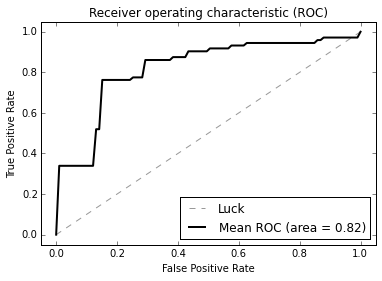

In [50]:
print total_test_score

print 'mean', np.mean(total_test_score), 'std',  np.std(total_test_score)

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

total_test_score
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(loc="lower right")
plt.show()
#skf = cross_validation.StratifiedKFold(y, n_folds=10)
#bc.classif(x,y,20)
#prediction.basicconn(skf,x,y)

## Multinet model

In [44]:
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.metrics import roc_curve, auc
from Proteus.proteus.predic import predlib as plib
from scipy import interp
reload(fselect)
reload(plib)
reload(prediction)

# feature selection
from sklearn.decomposition import PCA, FactorAnalysis

# selecte a network scale and extract the features
x = conn[6].loc[demograph.index.values].values
y = demograph['sz'].values
confounds = preprocessing.scale(demograph[['age','sex']].values)

encoder = preprocessing.LabelEncoder()
encoder.fit(y)

# remove intra matrix mean and var
x = ts.normalize_data(x)

cv = StratifiedKFold(y=encoder.transform(y), n_folds=10)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

total_test_score=0

def reshape_netwise(data_scale):
    for i in range(0,data_scale.shape[0]):
        if i==0:
            all_subjmat = ts.vec2mat(data_scale[i,:])[np.newaxis,...]
        else:        
            all_subjmat = np.vstack((all_subjmat,ts.vec2mat(data_scale[i,:])[np.newaxis,...]))
            
    #print all_subjmat.shape
    return all_subjmat

def format_nets(data, crms, select_idx, confounds):
    list_data = []
    for n in range(0,len(data)):        
        #tranform in matrix format
        crm = crms[n]
        clearn_data = crm.transform(confounds[select_idx,:],data[n][select_idx,:])
        tmp_mat = reshape_netwise(clearn_data)
        for i in range(0,tmp_mat.shape[2]):
            select_x = tmp_mat[:,:,i]
            list_data.append(select_x)
    return list_data  
    
for i, (train, test) in enumerate(cv):
    
    candidat_f = []
    
    #w = fselect.irelief_cross(x_scaled[train,:],encoder.transform(y[train]),10)
    #candidat_f = fselect.nBest(w,90)

    # init the bagging class
    clf = plib.bagging()
    
    full_data=[]
    full_crm=[]
    for n in [2,6]:
        x = conn[n].loc[demograph.index.values].values
        # remove intra matrix mean and var
        x = ts.normalize_data(x)
        full_data.append(x)
        crm = prediction.ConfoundsRm(confounds[train,:],x[train,:])
        full_crm.append(crm)
    
    x_list = format_nets(full_data, full_crm, train, confounds)
    
    for select_x in x_list:   
        clf_tmp = SVC(kernel='linear', class_weight='auto', C=.01)
        clf_tmp.probability = True
        #clf, score = plib.grid_search(clf, select_x[train,:], encoder.transform(y[train]), n_folds=10, verbose=False)
        clf_tmp.fit(select_x,encoder.transform(y[train]))
        clf.add(clf_tmp)
       
    x_list = format_nets(full_data, full_crm, train, confounds)
    print len(x_list)
    train_score = clf.score(x_list,encoder.transform(y[train]))
    x_list = formatdata(full_data, full_crm, test, confounds)
    test_score = clf.score(x_list,encoder.transform(y[test]))
    print "Train:",train_score
    print "Test :", test_score
    print "Prediction :",encoder.transform(clf.predict(x_list))
    print "Real Labels:",encoder.transform(y[test])

    total_test_score += test_score
    
    probas_ = clf.predict_proba(x_list)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    
    

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

total_test_score
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

print 'mean', np.mean(total_test_score)/float(len(cv))


217


ValueError: X.shape[1] = 190 should be equal to 20, the number of features at training time

In [34]:
def reshape_netwise(data_scale):
    for i in range(0,data_scale.shape[0]):
        if i==0:
            all_subjmat = ts.vec2mat(data_scale[i,:])[np.newaxis,...]
        else:        
            all_subjmat = np.vstack((all_subjmat,ts.vec2mat(data_scale[i,:])[np.newaxis,...]))
            
    print all_subjmat.shape
    return all_subjmat

l=[]
x = conn[3].loc[demograph.index.values].values

print reshape_netwise(x).shape

(146, 36, 36)
(146, 36, 36)


In [68]:
print l

print encoder.transform((l))

[0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1]
[0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1]
